In [1]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

from konlpy.tag import Kkma
kkma = Kkma()

from konlpy.tag import Komoran
komoran = Komoran()

from konlpy.tag import Okt
okt = Okt()

### 비교하기 
1. 성능


"아버지가방에들어가신다"

In [2]:
test_sent = "아버지가방에들어가신다"
print('Hannanum : ', hannanum.pos(test_sent))
print('Kkma : ', kkma.pos(test_sent))
print('Komoran : ', komoran.pos(test_sent))
print('Okt : ', okt.pos(test_sent))

Hannanum :  [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]
Kkma :  [('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]
Komoran :  [('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]
Okt :  [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


2. 시간

실행시간 : Mecab > Okt > Hannanum > Komoran > Kkma

In [3]:
import time

test_sent = "아버지가방에들어가신다"
start = time.time()
print('Hannanum : ', hannanum.pos(test_sent))
print('time : ', time.time()-start)
start = time.time()
print('Kkma : ', kkma.pos(test_sent))
print('time : ', time.time()-start)
start = time.time()
print('Komoran : ', komoran.pos(test_sent))
print('time : ', time.time()-start)
start = time.time()
print('Okt : ', okt.pos(test_sent))
print('time : ', time.time()-start)

Hannanum :  [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]
time :  0.006980180740356445
Kkma :  [('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]
time :  0.08477306365966797
Komoran :  [('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]
time :  0.002992868423461914
Okt :  [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]
time :  0.02094435691833496


### Okt 선택!

# 워드 클라우드
    - 빈도수를 기반으로 크기가 결정
    - 자주 나타나는 단어를 크게 보여줌

In [4]:
# 설치
! pip install wordcloud

In [5]:
# 데이터 불러오기

from konlpy.corpus import kolaw
fids = kolaw.fileids()
fobj = kolaw.open(fids[0])
print(fobj.read(140))

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모


In [6]:
fobj = kolaw.open(fids[0])
ko_doc = fobj.read()

In [7]:
# 워드 클라우드 그리기

from wordcloud import WordCloud

In [8]:
# wordcloud 객체 생성

wc = WordCloud(background_color='white', max_words=2000)
wc = wc.generate(ko_doc)

### WordCloud의 변수

- font_path
    - matlib 처럼 폰트가 깨질 수 있어 폰트 경로 지정
- max_words

- background_color

- mask
  

In [9]:
#generate()
wc = WordCloud(background_color='white', max_words=2000)
wc = wc.generate(ko_doc)

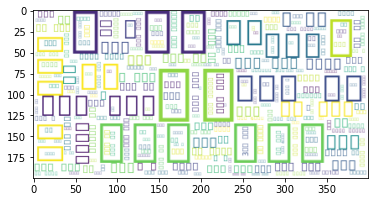

In [10]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation="bilinear")   # 크기: 가X세 400x200 (기본)
plt.show()

In [11]:
# font_path : 폰트 지정하기
wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf')
wc = wc.generate(ko_doc)

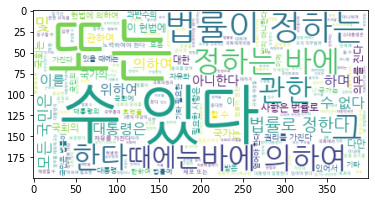

In [12]:
# 이제 다시 찍어보면 한글 잘 나옴
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [13]:
from collections import Counter

In [14]:
# generate_from_frequencies() : 미리 계산된 단어의 빈도수를넘겨줌

wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf')
count = Counter(ko_doc.split())
wc = wc.generate_from_frequencies(count)
count

Counter({'대한민국헌법': 1,
         '유구한': 1,
         '역사와': 1,
         '전통에': 1,
         '빛나는': 1,
         '우리': 1,
         '대한국민은': 1,
         '3·1운동으로': 1,
         '건립된': 1,
         '대한민국임시정부의': 1,
         '법통과': 1,
         '불의에': 1,
         '항거한': 1,
         '4·19민주이념을': 1,
         '계승하고,': 1,
         '조국의': 3,
         '민주개혁과': 1,
         '평화적': 4,
         '통일의': 1,
         '사명에': 1,
         '입각하여': 1,
         '정의·인도와': 1,
         '동포애로써': 1,
         '민족의': 1,
         '단결을': 1,
         '공고히': 1,
         '하고,': 2,
         '모든': 30,
         '사회적': 2,
         '폐습과': 1,
         '불의를': 1,
         '타파하며,': 1,
         '자율과': 1,
         '조화를': 2,
         '바탕으로': 1,
         '자유민주적': 2,
         '기본질서를': 1,
         '더욱': 1,
         '확고히': 1,
         '하여': 1,
         '정치·경제·사회·문화의': 1,
         '영역에': 2,
         '있어서': 9,
         '각인의': 1,
         '기회를': 2,
         '균등히': 1,
         '능력을': 1,
         '최고도로': 1,
         '발휘하게': 1,
         '하며,': 18,
   

In [15]:
count.most_common(20)

[('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다.', 57),
 ('한다.', 56),
 ('정하는', 50),
 ('그', 44),
 ('때에는', 42),
 ('관한', 39),
 ('바에', 37),
 ('국민은', 35),
 ('모든', 30),
 ('법률로', 30),
 ('정한다.', 28),
 ('위하여', 26),
 ('가진다.', 25),
 ('아니한다.', 25),
 ('및', 25)]

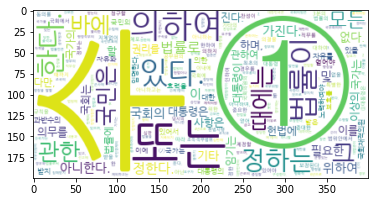

In [16]:
plt.imshow(wc, interpolation="bilinear")
plt.show()

## 의미 없는 단어 제거 (명사만!)

In [17]:
from konlpy.tag import Okt
okt = Okt()

In [18]:
ko_doc_noun = okt.nouns(ko_doc)
print(ko_doc_noun)

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수', '제', '헌법', '체결', '공포', '조약', '일반'

In [19]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun) # 빈도수 전달

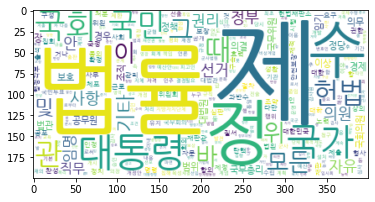

In [20]:
import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

### stopword 제거하기
- stopword 란?
    - 의미가 없는 토큰


- 우리는 pop() 을 이용하여 제거

In [21]:
count_noun.most_common()

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55),
 ('헌법', 53),
 ('그', 47),
 ('이', 38),
 ('모든', 37),
 ('바', 37),
 ('위', 36),
 ('기타', 26),
 ('및', 25),
 ('사항', 23),
 ('권리', 21),
 ('안', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('직무', 19),
 ('국무총리', 19),
 ('경제', 18),
 ('의무', 18),
 ('조직', 18),
 ('국회의원', 18),
 ('임기', 18),
 ('의결', 17),
 ('공무원', 17),
 ('경우', 17),
 ('이상', 17),
 ('국무위원', 17),
 ('대법원', 17),
 ('범위', 16),
 ('장', 15),
 ('법관', 15),
 ('보호', 14),
 ('정책', 14),
 ('정당', 14),
 ('헌법재판소', 14),
 ('재적', 14),
 ('회의', 14),
 ('항의', 14),
 ('관리', 14),
 ('노력', 13),
 ('보장', 13),
 ('거나', 13),
 ('요구', 13),
 ('법원', 12),
 ('집회', 12),
 ('과반수', 12),
 ('출석', 12),
 ('찬성', 12),
 ('대한민국', 11),
 ('조약', 11),
 ('다만', 11),
 ('재판', 11),
 ('인', 11),
 ('동의', 11),
 ('탄핵', 11),
 ('권한', 11),
 ('안전보장', 10),
 ('공포', 10),
 ('대한', 10),
 ('심판', 10),
 ('시행', 10),
 ('재판관', 10),
 ('위원', 10),
 ('정치', 9),
 ('효력', 9),
 ('대하',

In [22]:
count_noun.pop('제')
count_noun.pop('정')
count_noun.pop('수')
count_noun.pop('관')
count_noun.pop('때')
count_noun.pop('그')
count_noun.pop('이')
count_noun.pop('바')
count_noun.pop('위')

36

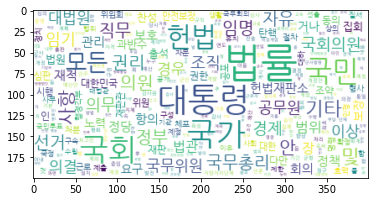

In [23]:
wc_noun = wc_noun.generate_from_frequencies(count_noun)

plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

In [24]:
# 보통 1글자인 단어를 제거하니까
# 1글자로 이루어진 단어 제거하기

stopword_list = []

for noun_word in count_noun:
    if len(noun_word) == 1:
        stopword_list.append(noun_word)
        
stopword_list[:5]

['법', '입', '애', '안', '밖']

In [25]:
# 1글자인 단어를 모두 pop()

for stopword in stopword_list:
    count_noun.pop(stopword)

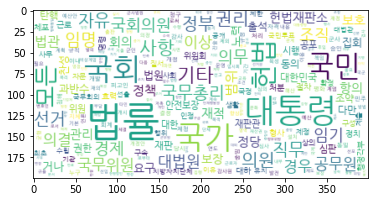

In [26]:
wc_noun = wc_noun.generate_from_frequencies(count_noun)

plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

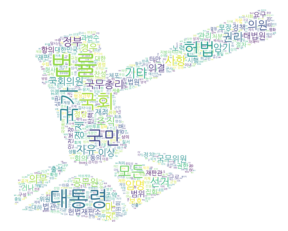

In [28]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('law.jpg'))

wc_img = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf',
                  mask=img_mask)

wc_img = wc_img.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_img, interpolation="bilinear")
plt.axis("off")
plt.show()